<a href="https://colab.research.google.com/github/veapasichnyk/Deposit-forecasting-ukr/blob/main/Mid_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

##Імпорти

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from sklearn.model_selection import cross_val_score
from lightgbm import early_stopping, log_evaluation
import shap

In [2]:
%load_ext autoreload
%autoreload 2

from preprocess_data import preprocess_data, get_selected_features

##Завантаження даних

In [3]:
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [4]:
df = df[~df.duplicated()] #видалення дублікатів колонок

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Огляд даних
print(df.shape)
print(df.info())

(41176, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 no

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Спостереження**

Усе виглядає добре! Дані повні (без пропущених значень у NaN), і обсяг досить великий (41 176 записів), тож можна сміливо переходити до EDA.

##EDA

###Розподіл цільової змінної `y`

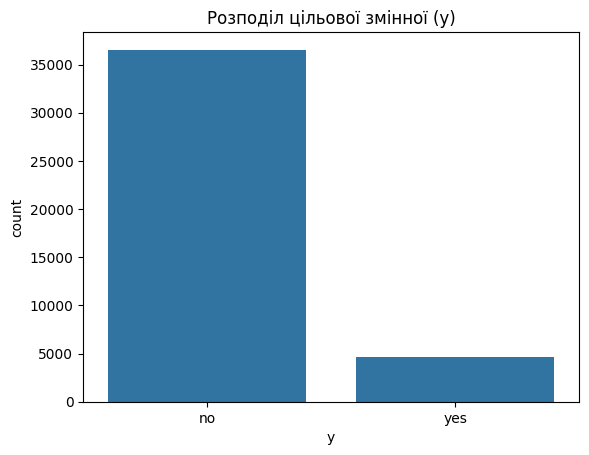

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


In [8]:
# Частота класів
sns.countplot(data=df, x='y')
plt.title('Розподіл цільової змінної (y)')
plt.show()

# Частка
print(df['y'].value_counts(normalize=True))

**Спостереження**

Сильний дисбаланс (no ≈ 88%, yes ≈ 11%).

###Аналіз пропущених/невідомих значень

In [9]:
cat_cols = df.select_dtypes(include='object')

for col in cat_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} ('unknown' = {(unknown_count / len(df) * 100):.2f}%)")

job: 330 ('unknown' = 0.80%)
marital: 80 ('unknown' = 0.19%)
education: 1730 ('unknown' = 4.20%)
default: 8596 ('unknown' = 20.88%)
housing: 990 ('unknown' = 2.40%)
loan: 990 ('unknown' = 2.40%)


**Спостереження**

default	20.88% - висока частка, варто залишити як окрему категорію (має інформативність).

### Одновимірний аналіз

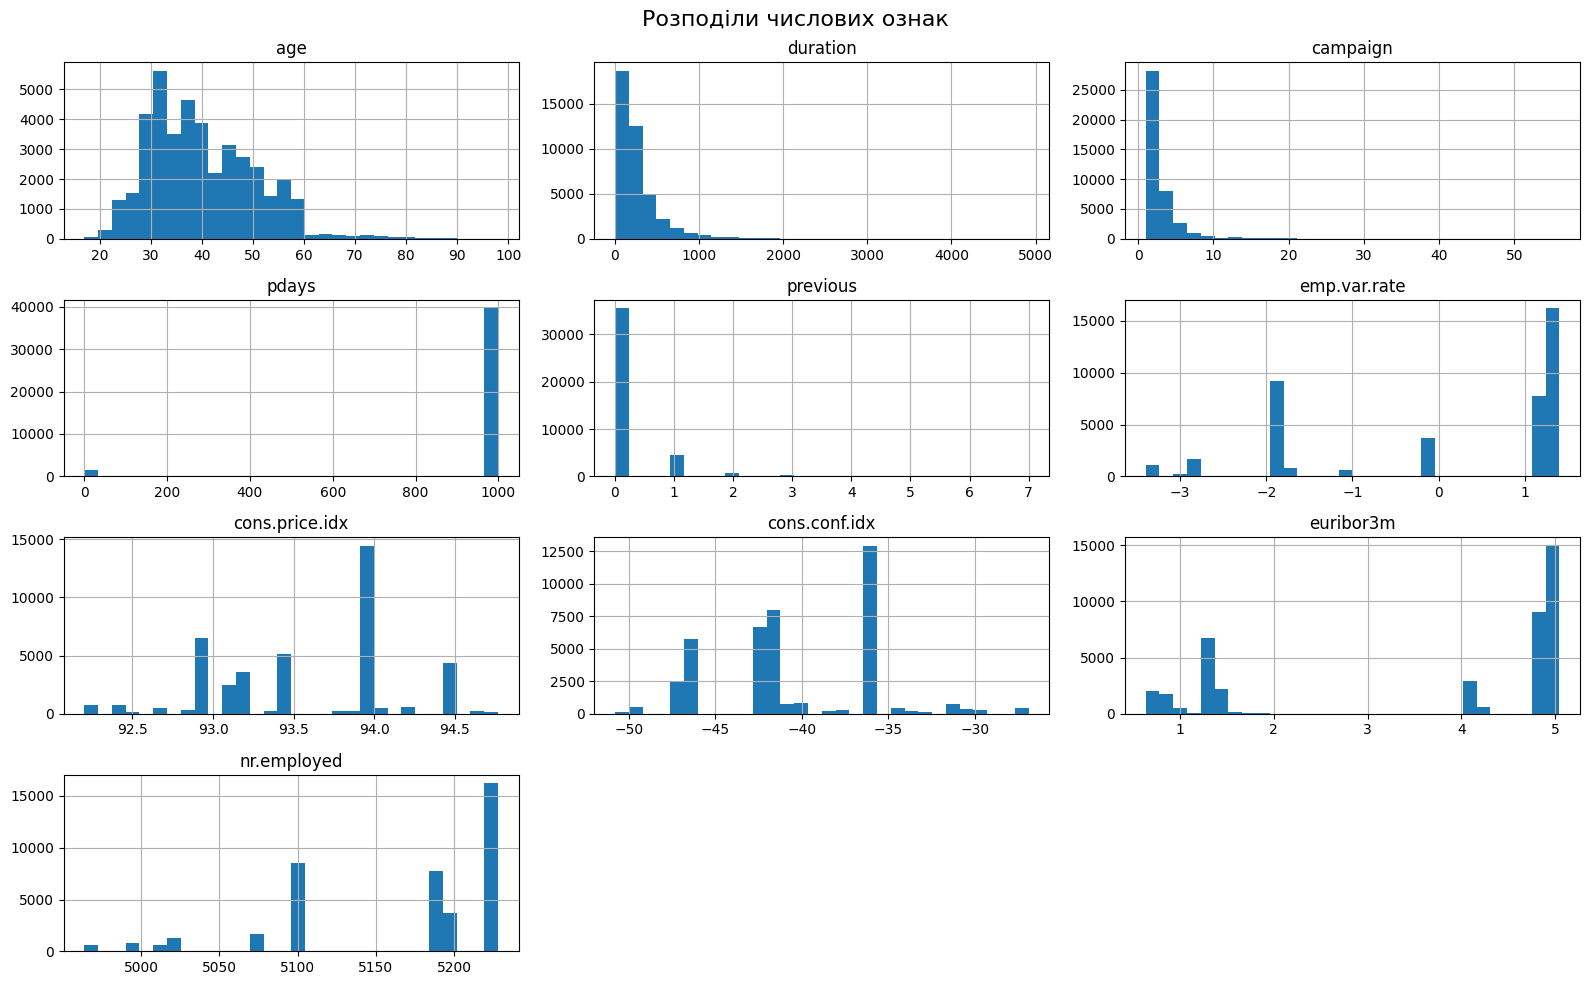

In [10]:
# Одновимірний аналіз числових змінних
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].describe().T  # описова статистика

df[numeric_cols].hist(bins=30, figsize=(16, 10))
plt.suptitle("Розподіли числових ознак", fontsize=16)
plt.tight_layout()
plt.show()

**Спостереження**

`campaign`, `pdays`, `previous` - мають скошені розподіли, є потенційні викиди.

`emp.var.rate`, `euribor3m` - важливі для моделі, але варто перевірити лінійність.

/tmp/ipython-input-3859503035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3859503035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3859503035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3859503035.py:15: FutureWarning: 

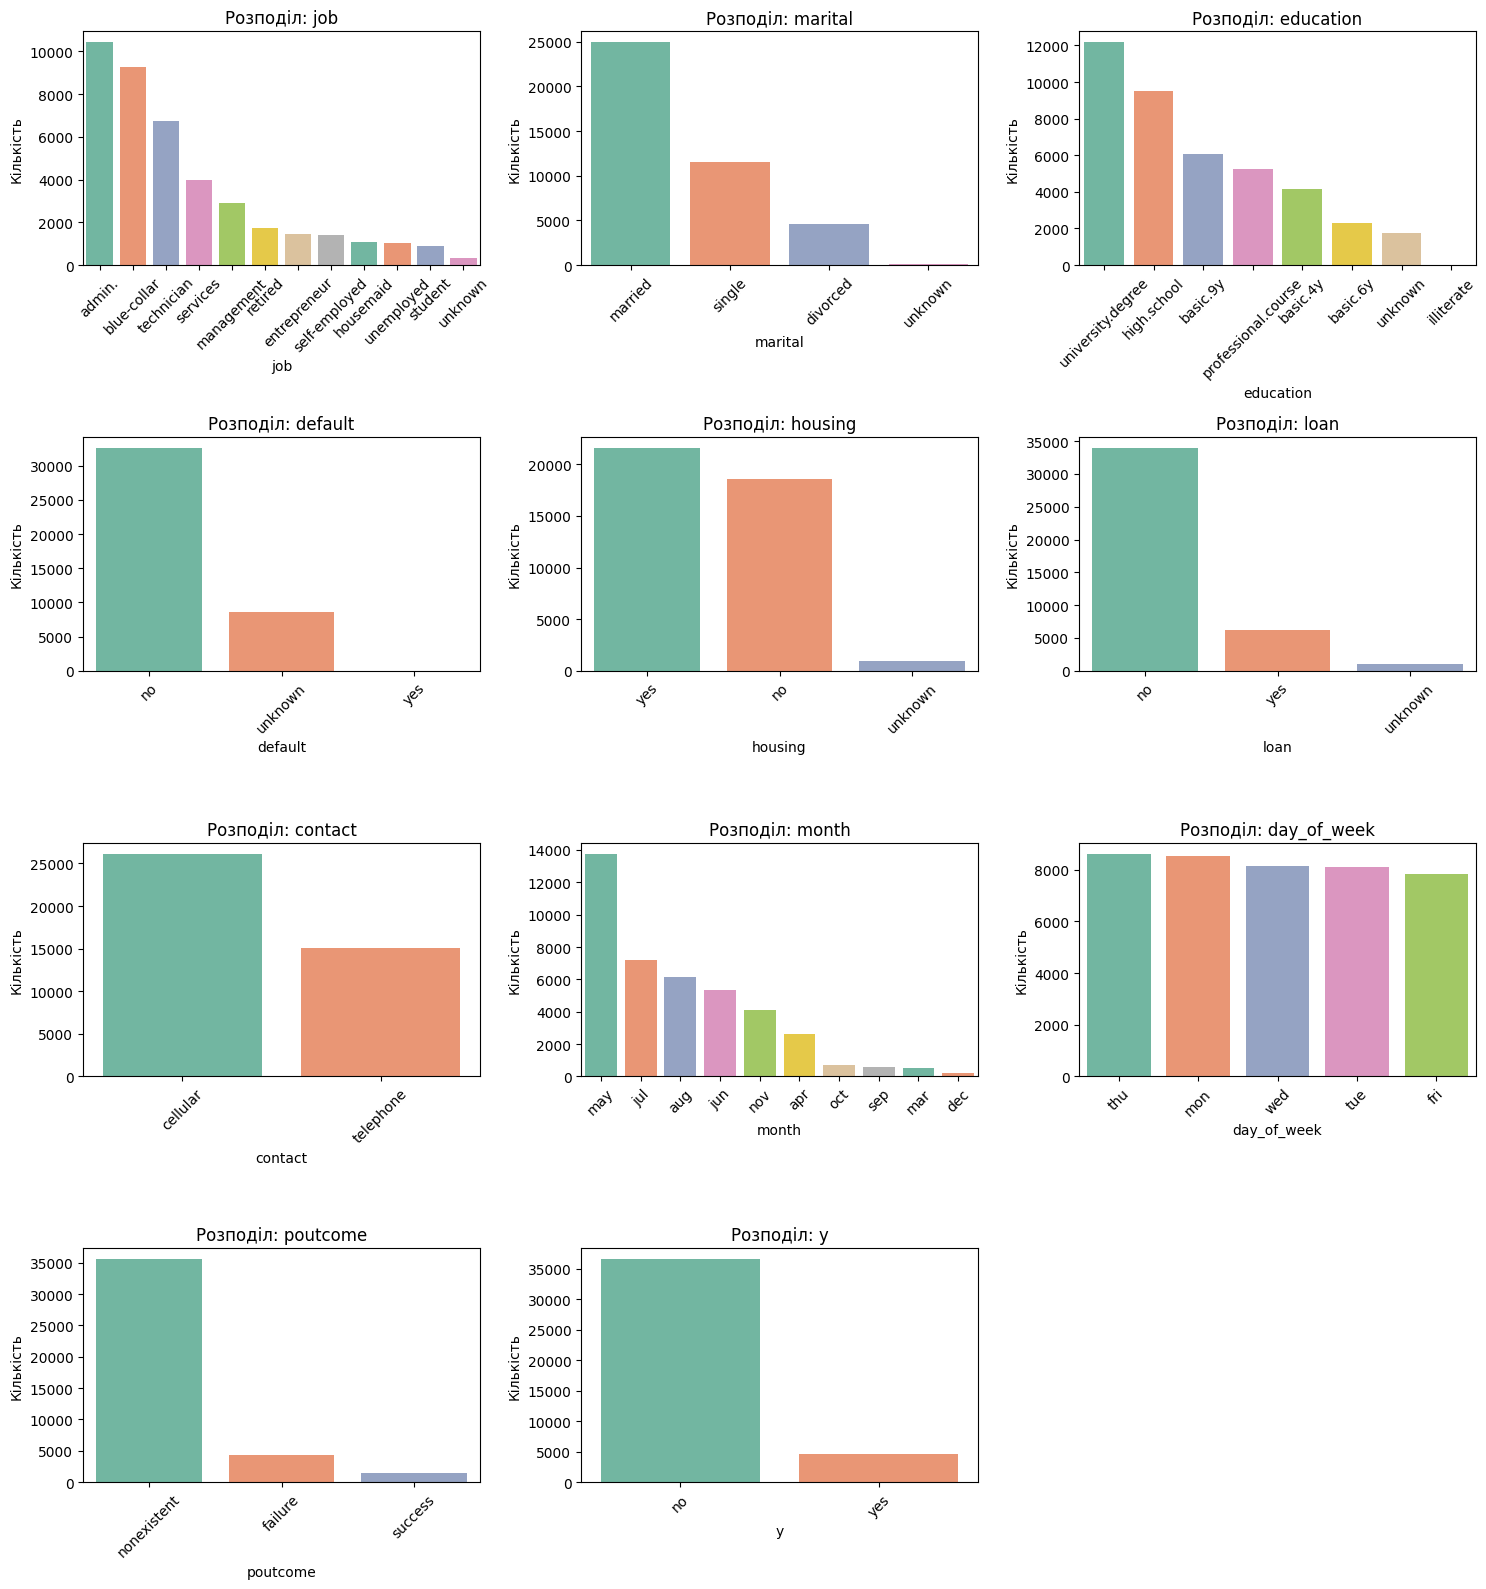

In [11]:
# Одновимірний аналіз категоріальних змінних
# Категоріальні змінні
cat_cols = df.select_dtypes(include='object').columns

# Розміри сітки
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

# Створення полотна
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Побудова графіків
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="Set2")
    axes[i].set_title(f'Розподіл: {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Кількість')

# Видалити порожні осі, якщо є
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Спостереження**

- `job`: багато категорій, включаючи unknown.

- `month`: найбільше контактів у травні (may).

- `contact`: два типи - cellular і telephone, cellular домінує.

- `education`: важливо для цільової змінної - часто впливає.

### Двовимірний аналіз

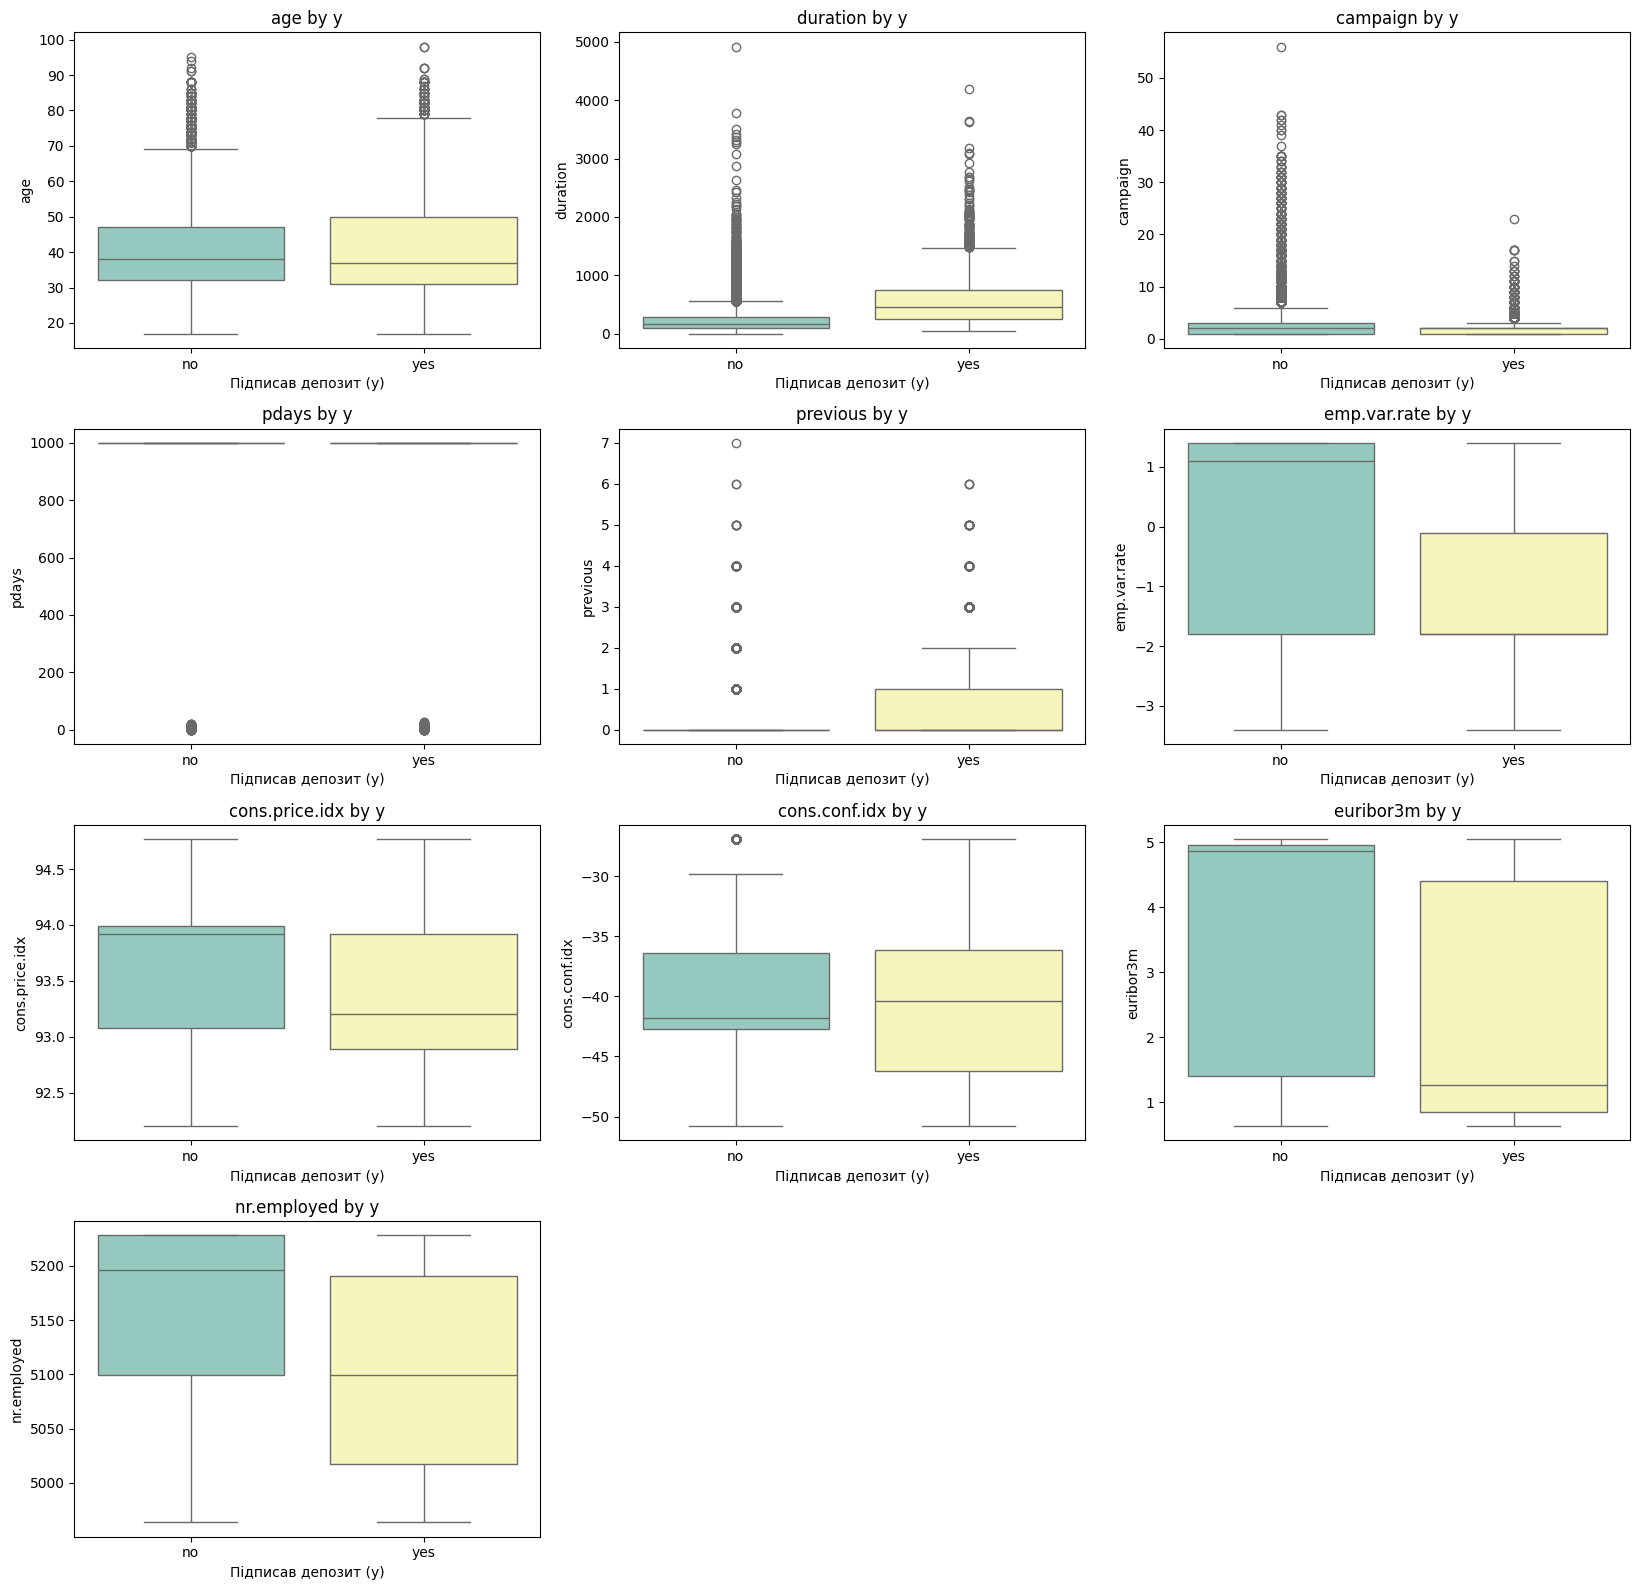

In [12]:
# Двовимірний: числові змінні vs цільова змінна
# Розміри сітки
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5.5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='y', y=col, ax=axes[i], hue='y', palette='Set3', dodge=False, legend=False)
    axes[i].set_title(f'{col} by y')
    axes[i].set_xlabel('Підписав депозит (y)')
    axes[i].set_ylabel(col)

# Видалити порожні осі
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Спостереження**

- `age` -	у підписантів трохи вищий середній вік (40.9 vs 39.9), але медіана менша (37 vs 38), що може свідчити про більшу варіативність.

- `duration` -	дуже суттєва різниця: середня тривалість дзвінка майже в 2.5 рази вища у підписантів (553s vs 221s). Це ключова ознака, але вона виключена з моделювання через витік інформації.

- `campaign` -	підписанти зазвичай отримують менше контактів (2.05 vs 2.63), з меншою дисперсією - ймовірно, погоджуються раніше.

- `previous` -	у підписантів більше попередніх контактів (0.56 vs 0.13) - вони вже мали досвід взаємодії.

- `emp.var.rate` -	позитивні значення у підписантів (-0.13 vs -1.84), що може означати кращу макроекономічну ситуацію під час кампанії.

- `euribor3m` -	значно нижча ставка серед підписантів (2.12 vs 3.81), ймовірно - більш привабливі умови депозиту.

- `nr.employed` -	 періоди з меншим рівнем зайнятості (5095 vs 5176) підписантів більше - можливо, через більшу фінансову невпевненість.

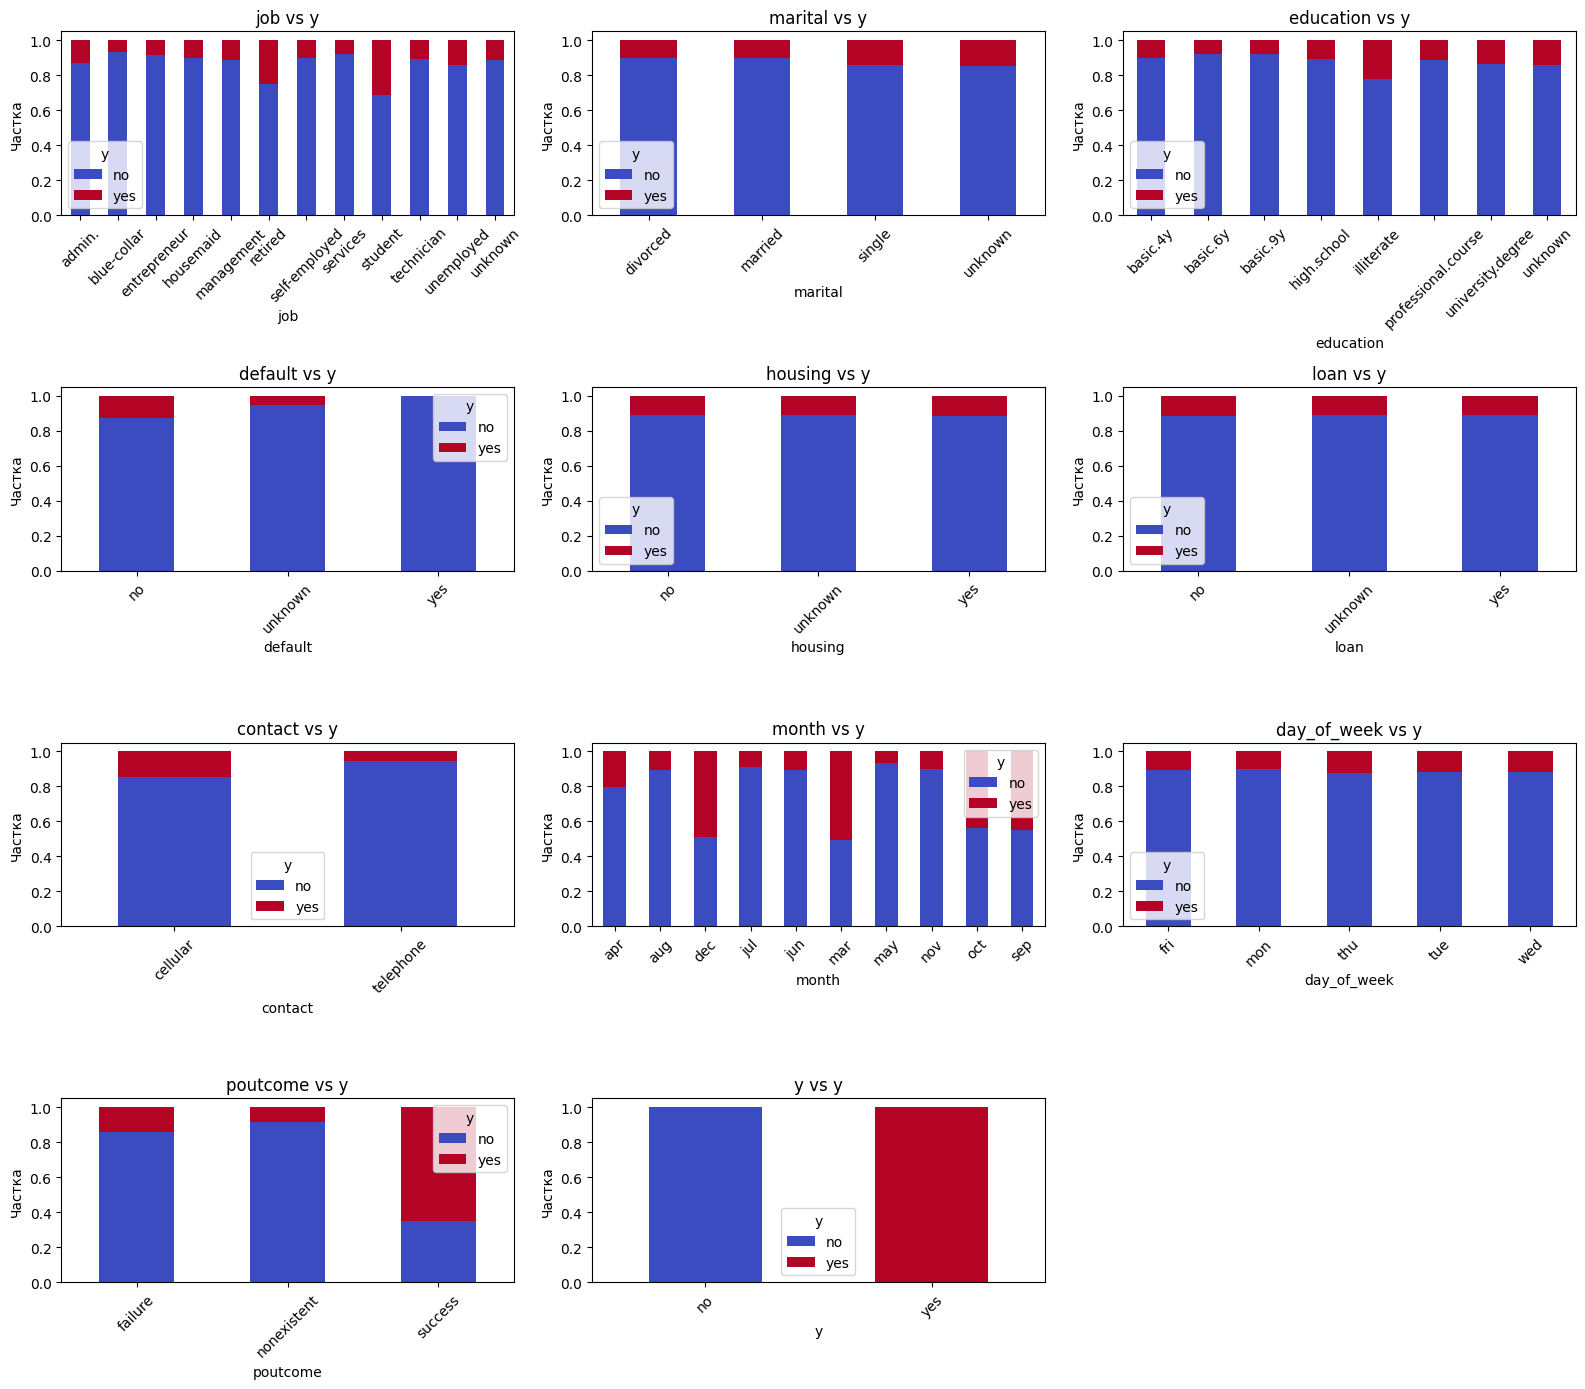

In [13]:
# Двовимірний: категоріальні змінні vs y
# Розміри сітки
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

# Створення полотна
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

# Побудова графіків двовимірного аналізу
for i, col in enumerate(cat_cols):
    cross = pd.crosstab(df[col], df['y'], normalize='index')
    cross.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm', figsize=(16,14))
    axes[i].set_title(f'{col} vs y')
    axes[i].set_ylabel('Частка')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)  # Поворот категорій для кращої видимості

# Видалити зайві осі, якщо є
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Спостереження**

- `month`: найкраща конверсія у березні, грудні, жовтні, вересні.

- `education`, `job`, `poutcome` і `contact` мають вплив на результат.

###Кореляційна матриця (числові змінні)

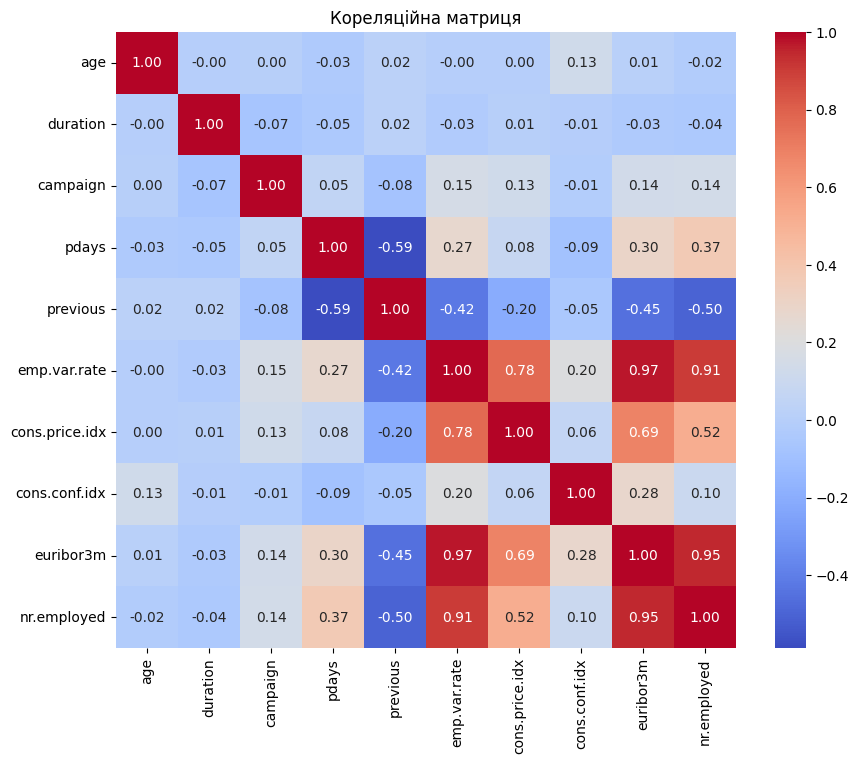

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

**Спостереження**

Дуже високі кореляції між деякими ознаками (майже 1.0 або -1.0), які потенційно шкодять інтерпретованості моделі.

**Загальний висновок**

 Тип задачі - це бінарна класифікація: цільова змінна `y` набуває значень `yes` або `no`, що означає - клієнт підписав строковий депозит чи ні.

Доречні методи моделювання:

- Базові моделі:

Логістична регресія (швидка, інтерпретована модель, дає хорошу базову оцінку)

- Дерева рішень і ансамблі:

Decision Tree Classifier (інтерпретований, але схильний до перенавчання)

Random Forest (стабільний, добре працює з незначною підготовкою даних)

Gradient Boosting (XGBoost, LightGBM)(висока точність, гарно обробляє незбалансованість і різні типи змінних, часто найкращий вибір для подібних задач)

- Інші методи:

kNN – для тестування простих рішень

`yes` лише близько 11% - набір даних незбалансований, тому accuracy не підходить як метрика.

Обрана метрика якості моделі -  AUROC (Area Under the ROC Curve): незалежна від порогу класифікації, враховує співвідношення TPR (Recall) і FPR, найкраща для незбалансованих наборів даних, відображає здатність моделі відділяти класи.



##Препроцесинг даних

In [15]:
X_train, y_train, X_val, y_val, X_test, y_test, input_cols, scaler, encoder = preprocess_data(df)

# Перевіримо розміри
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"X_test shape:   {X_test.shape}")
print(f"y_test shape:   {y_test.shape}")

[LightGBM] [Info] Number of positive: 2783, number of negative: 21922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 24705, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112649 -> initscore=-2.063961
[LightGBM] [Info] Start training from score -2.063961
[LightGBM] [Info] Number of positive: 2783, number of negative: 21922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 24705, number of used features: 69
[LightGBM] [Info] [bi

In [16]:
#Дивимось, які фічі залишились після Cluster top-1
selected_features = get_selected_features()

print("Selected features:", selected_features)
print("Number of selected features:", len(selected_features))

Selected features: ['age', 'campaign', 'campaign_inv', 'campaign_x_contact', 'cci_bin_high', 'cci_bin_low', 'cci_bin_med', 'cons.conf.idx', 'cons.price.idx', 'contact_x_day', 'cpi_bin_high', 'cpi_bin_low', 'cpi_bin_med', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'default_yes', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'euribor3m', 'housing_no', 'housing_unknown', 'is_contact_cellular', 'is_contact_cellular_recent', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'loan_no', 'loan_yes', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',

In [17]:
#Оцінити, наскільки ще залишилась кореляція
corr = X_train.corr().abs()
np.fill_diagonal(corr.values, 0)
print("Max |corr| among selected:", corr.values.max())

Max |corr| among selected: 0.9469076733960072


**Спостереження**

Добре! Тепер зменшено кількість ознак до 66  і контрольовано рівень мультиколінеарності. Це важливий крок до побудови більш стабільної та інтерпретованої моделі.

## Тренування різних типів моделей машинного навчання



###LogisticRegression

In [18]:
# Навчання моделі
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [19]:
# Передбачення
y_train_pred = logreg.predict(X_train)
y_val_pred = logreg.predict(X_val)
y_train_proba = logreg.predict_proba(X_train)[:, 1]  # для AUROC
y_val_proba = logreg.predict_proba(X_val)[:, 1]  # для AUROC

# 4. Метрики
print("Logistic Regression Metrics on Validation and AUROC Train:")
print(f"AUROC Train:      {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"AUROC Validation: {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"F1 Score:         {f1_score(y_val, y_val_pred):.4f}")
print(f"Recall:           {recall_score(y_val, y_val_pred):.4f}")
print(f"Precision:        {precision_score(y_val, y_val_pred):.4f}")

Logistic Regression Metrics on Validation and AUROC Train:
AUROC Train:      0.7916
AUROC Validation: 0.8012
F1 Score:         0.4612
Recall:           0.6272
Precision:        0.3647


**Cпостереження**

Це досить непоганий початковий результат для базової логістичної регресії.

AUROC ~0.80 означає: модель добре розділяє класи - навіть попри дисбаланс

Recall 0.63 - вона вловлює більшість клієнтів, які погодяться на депозит

Precision 0.36 - частина передбачень `yes` - помилкові (що очікувано без тонкої оптимізації)

###kNN

In [20]:
#Навчання моделі
knn_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
# Передбачення
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_train_proba = knn_model.predict_proba(X_train)[:, 1]  # для AUROC
y_val_proba = knn_model.predict_proba(X_val)[:, 1]  # для AUROC

# 4. Метрики
print("KNN Metrics on Validation and AUROC Train:")
print(f"AUROC Train:       {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"AUROC Validation:  {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"F1 Score:          {f1_score(y_val, y_val_pred):.4f}")
print(f"Recall:            {recall_score(y_val, y_val_pred):.4f}")
print(f"Precision:         {precision_score(y_val, y_val_pred):.4f}")

KNN Metrics on Validation and AUROC Train:
AUROC Train:       0.8904
AUROC Validation:  0.7425
F1 Score:          0.2911
Recall:            0.1897
Precision:         0.6263


**Спостереження**

kNN дуже обережний - висока precision, але втрачає більшість позитивів

AUROC Validation < LogisticRegression - модель гірше розділяє класи

Recall 19% - дуже погано для задачі банківського маркетингу (нам важливо не пропустити охочих клієнтів!)

###DecisionTree

In [22]:
# Ініціалізація Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=12,             # контроль складності
    min_samples_leaf=20,      # згладжує шум/перенавчання
    min_samples_split=40,     # правило: ~2×min_samples_leaf для стабільності
    class_weight='balanced',  # важливо через дисбаланс
    max_features='log2'       # трохи регуляризації
)

In [23]:
# Навчання
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       max_features='log2', min_samples_leaf=20,
                       min_samples_split=40, random_state=42)

In [24]:
# Передбачення
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_train_proba = dt_model.predict_proba(X_train)[:, 1]  # для AUROC
y_val_proba = dt_model.predict_proba(X_val)[:, 1]  # для AUROC

# Метрики
print("DecisionTree Metrics on Validation and AUROC Train:")
print(f"AUROC Train:       {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"AUROC Validation:  {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"F1 Score:          {f1_score(y_val, y_val_pred):.4f}")
print(f"Recall:            {recall_score(y_val, y_val_pred):.4f}")
print(f"Precision:         {precision_score(y_val, y_val_pred):.4f}")

DecisionTree Metrics on Validation and AUROC Train:
AUROC Train:       0.8110
AUROC Validation:  0.7759
F1 Score:          0.4141
Recall:            0.6185
Precision:         0.3113


**Спостереження**

Decision Tree добре балансує AUROC, Recall та F1, але Precision все ще низька.


###XGBoost

In [25]:
#Баланс класів для scale_pos_weight
pos = int(y_train.sum())
neg = int((1 - y_train).sum())
spw = neg / max(pos, 1)
print(f"scale_pos_weight ≈ {spw:.2f}")

scale_pos_weight ≈ 7.88


In [26]:
xgb_model = XGBClassifier(
    #tree_method='gpu_hist',          # Активує GPU
    #predictor='gpu_predictor',       # GPU для прогнозування
    max_depth=5,
    learning_rate=0.05,
    n_estimators=100,
    eval_metric='auc',
    scale_pos_weight=spw,
    use_label_encoder=False,
    random_state=42

)

In [27]:
# Навчання
xgb_model.fit(
    X_train, y_train
)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:11:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
# Ймовірності класу 1
xgb_train_proba = xgb_model.predict_proba(X_train)[:, 1]
xgb_val_proba = xgb_model.predict_proba(X_val)[:, 1]

# Класові передбачення за замовчуванням (порог = 0.5)
xgb_val_preds = xgb_model.predict(X_val)

# Метрики
print("XGBoost Metrics on Validation and Train:")
print(f"AUROC Train:      {roc_auc_score(y_train, xgb_train_proba):.4f}")
print(f"AUROC Validation: {roc_auc_score(y_val, xgb_val_proba):.4f}")
print(f"F1 Score:         {f1_score(y_val, xgb_val_preds):.4f}")
print(f"Recall:           {recall_score(y_val, xgb_val_preds):.4f}")
print(f"Precision:        {precision_score(y_val, xgb_val_preds):.4f}")

XGBoost Metrics on Validation and Train:
AUROC Train:      0.8278
AUROC Validation: 0.8088
F1 Score:         0.4777
Recall:           0.6358
Precision:        0.3826


**Спостереження**

Поки що XGBoost - найкращий баланс між точністю, відтворюваністю та AUROC.

###LightGBM

In [30]:
#Ініціалізація моделі
lgb_model = LGBMClassifier(
    objective="binary",
    random_state=42,
    class_weight='balanced',   # з огляду на дисбаланс
    reg_alpha=1.0,             # L1 регуляризація
    reg_lambda=3.0,            # L2 регуляризація
    max_depth=4,               # контроль глибини
    num_leaves=31,             # контроль складності дерева
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.8,             # Bagging
    colsample_bytree=0.8       # Feature subsampling
)

In [31]:
#Тренування
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2783, number of negative: 21922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 24705, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, max_depth=4, objective='binary',
               random_state=42, reg_alpha=1.0, reg_lambda=3.0, subsample=0.8)

In [32]:
# Прогнози
lgb_train_proba = lgb_model.predict_proba(X_train)[:, 1]
lgb_val_proba = lgb_model.predict_proba(X_val)[:, 1]
lgb_val_preds = lgb_model.predict(X_val)

# Метрики
print("LightGBM Metrics on Validation and Train:")
print(f"AUROC Train:      {roc_auc_score(y_train, lgb_train_proba):.4f}")
print(f"AUROC Validation: {roc_auc_score(y_val, lgb_val_proba):.4f}")
print(f"F1 Score:         {f1_score(y_val, lgb_val_preds):.4f}")
print(f"Recall:           {recall_score(y_val, lgb_val_preds):.4f}")
print(f"Precision:        {precision_score(y_val, lgb_val_preds):.4f}")

LightGBM Metrics on Validation and Train:
AUROC Train:      0.8115
AUROC Validation: 0.8112
F1 Score:         0.4771
Recall:           0.6466
Precision:        0.3781


**Спостереження**

AUROC Validation найвищий серед усіх моделей до цього моменту (0.8112).

Модель не перенавчена - AUROC на Train ≈ Validation.

Регуляризація (L1 + L2) та `class_weight='balanced'` позитивно вплинули.

##Таблиця з порівнянням моделей

In [33]:
# Налаштування для відображення тексту в таблиці
pd.set_option('display.max_colwidth', None)

# Створюємо таблицю з результатами моделей
model_results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Hyperparameters": "class_weight='balanced', max_iter=1000, random_state=42",
        "AUROC Train": 0.7916,
        "AUROC Validation": 0.8012,
        "Comment": "Сильний бейзлайн, хороша узагальненість, але обмежена складність."
    },
    {
        "Model": "kNN (k=10)",
        "Hyperparameters": "n_neighbors=10, weights='uniform'",
        "AUROC Train": 0.8943,
        "AUROC Validation": 0.7425,
        "Comment": "Схильна до перенавчання. Висока точність при низькому recall. Менш придатна для задачі."
    },
    {
        "Model": "Decision Tree",
        "Hyperparameters": "random_state=42, max_depth=12, min_samples_leaf=20, min_samples_split=40, class_weight='balanced', max_features='log2'",
        "AUROC Train": 0.8110,
        "AUROC Validation": 0.7759,
        "Comment": "Проста модель, непоганий результат. Варто протестувати зі складнішою настройкою або ансамблями."
    },
    {
        "Model": "XGBoost",
        "Hyperparameters": "max_depth=5, learning_rate=0.05, n_estimators=100, eval_metric='auc', scale_pos_weight=spw, use_label_encoder=False, random_state=42",
        "AUROC Train": 0.8278,
        "AUROC Validation": 0.8088,
        "Comment": "Міцний гравець. Має потенціал. Варто тюнити параметри (регуляризація, depth, class_weight)."
    },
    {
        "Model": "LightGBM",
        "Hyperparameters": "reg_alpha=1.0, reg_lambda=3.0, class_weight='balanced', max_depth=4, num_leaves=31, learning_rate=0.05, n_estimators=100, subsample=0.8, colsample_bytree=0.8",
        "AUROC Train": 0.8115,
        "AUROC Validation": 0.8112,
        "Comment": "Найкращий баланс Train/Validation. Хороша регуляризація, стабільна. Тому обираю її як основну."
    }
])

# Створення DataFrame
df_models = pd.DataFrame(model_results)

# Відображення таблиці
df_models

,Model,Hyperparameters,AUROC Train,AUROC Validation,Comment
0,Logistic Regression,"class_weight='balanced', max_iter=1000, random_state=42",0.7916,0.8012,"Сильний бейзлайн, хороша узагальненість, але обмежена складність."
1,kNN (k=10),"n_neighbors=10, weights='uniform'",0.8943,0.7425,Схильна до перенавчання. Висока точність при низькому recall. Менш придатна для задачі.
2,Decision Tree,"random_state=42, max_depth=12, min_samples_leaf=20, min_samples_split=40, class_weight='balanced', max_features='log2'",0.8110,0.7759,"Проста модель, непоганий результат. Варто протестувати зі складнішою настройкою або ансамблями."
3,XGBoost,"max_depth=5, learning_rate=0.05, n_estimators=100, eval_metric='auc', scale_pos_weight=spw, use_label_encoder=False, random_state=42",0.8278,0.8088,"Міцний гравець. Має потенціал. Варто тюнити параметри (регуляризація, depth, class_weight)."
4,LightGBM,"reg_alpha=1.0, reg_lambda=3.0, class_weight='balanced', max_depth=4, num_leaves=31, learning_rate=0.05, n_estimators=100, subsample=0.8, colsample_bytree=0.8",0.8115,0.8112,"Найкращий баланс Train/Validation. Хороша регуляризація, стабільна. Тому обираю її як основну."


##Тюнінг гіперпараметрів для LightGBM

###RandomizedSearchCV (з sklearn)

In [34]:
# Параметри для Randomized Search
param_dist = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgb_clf = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

random_search = RandomizedSearchCV(
    lgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 2783, number of negative: 21922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 24705, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112649 -> initscore=-2.063961
[LightGBM] [Info] Start training from score -2.063961


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(objective='binary',
                                            random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [20, 31, 40, 50],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [35]:
# Оцінка моделі
best_model_rs = random_search.best_estimator_
train_auc_rs = roc_auc_score(y_train, best_model_rs.predict_proba(X_train)[:, 1])
val_auc_rs = roc_auc_score(y_val, best_model_rs.predict_proba(X_val)[:, 1])

print("RandomizedSearchCV Best Params:", random_search.best_params_)
print(f"Train AUROC: {train_auc_rs:.4f}")
print(f"Validation AUROC: {val_auc_rs:.4f}")

RandomizedSearchCV Best Params: {'subsample': 1.0, 'num_leaves': 20, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Train AUROC: 0.8302
Validation AUROC: 0.8142


**Спостереження**

RS знайшов конфіг із Val AUROC 0.8142, що краще «fixed budget» (0.8112).

###Hyperopt (байєсівська оптимізація)

In [36]:
# Простір гіперпараметрів
space = {
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'feature_fraction': hp.uniform('feature_fraction', 0.6, 1.0),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.6, 1.0),
    'min_child_samples': hp.quniform('min_child_samples', 10, 100, 1),
    'lambda_l1': hp.uniform('lambda_l1', 0, 5),
    'lambda_l2': hp.uniform('lambda_l2', 0, 5),
}


In [37]:
def objective(params):
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_samples'] = int(params['min_child_samples'])

    model = LGBMClassifier(
        n_estimators=200,
        objective='binary',
        metric='auc',
        boosting_type='gbdt',
        verbosity=-1,
        random_state=42,
        **params
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc').mean()
    return {'loss': -score, 'status': STATUS_OK}

In [38]:
# Запуск оптимізації
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    rstate=np.random.default_rng(42)
)

print("Найкращі параметри:")
print(best)

100%|██████████| 100/100 [04:23<00:00,  2.64s/trial, best loss: -0.7938870174265326]
Найкращі параметри:
{'bagging_fraction': np.float64(0.6532862880905912), 'feature_fraction': np.float64(0.6621422616094998), 'lambda_l1': np.float64(4.738538693265129), 'lambda_l2': np.float64(2.5310540686791274), 'learning_rate': np.float64(0.13522535305367275), 'max_depth': np.float64(4.0), 'min_child_samples': np.float64(100.0), 'num_leaves': np.float64(111.0)}


In [39]:
decoded_params = {
    'num_leaves': int(best['num_leaves']),
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'feature_fraction': best['feature_fraction'],
    'bagging_fraction': best['bagging_fraction'],
    'min_child_samples': int(best['min_child_samples']),
    'lambda_l1': best['lambda_l1'],
    'lambda_l2': best['lambda_l2']
}

print("Decoded hyperparameters:")
for k, v in decoded_params.items():
    print(f"{k}: {v}")

Decoded hyperparameters:
num_leaves: 111
max_depth: 4
learning_rate: 0.13522535305367275
feature_fraction: 0.6621422616094998
bagging_fraction: 0.6532862880905912
min_child_samples: 100
lambda_l1: 4.738538693265129
lambda_l2: 2.5310540686791274


In [40]:
# Ініціалізація моделі з оптимальними гіперпараметрами
lgb_best = LGBMClassifier(
    n_estimators=200,
    objective='binary',
    random_state=42,
    **decoded_params
)
lgb_best.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=np.float64(0.6532862880905912),
               feature_fraction=np.float64(0.6621422616094998),
               lambda_l1=np.float64(4.738538693265129),
               lambda_l2=np.float64(2.5310540686791274),
               learning_rate=np.float64(0.13522535305367275), max_depth=4,
               min_child_samples=100, n_estimators=200, num_leaves=111,
               objective='binary', random_state=42)

In [41]:
# Прогноз і оцінка якості
y_val_pred_proba = lgb_best.predict_proba(X_val)[:, 1]
y_train_pred_proba = lgb_best.predict_proba(X_train)[:, 1]

print(f"Train AUROC: {roc_auc_score(y_train, y_train_pred_proba):.4f}")
print(f"Validation AUROC: {roc_auc_score(y_val, y_val_pred_proba):.4f}")

Train AUROC: 0.8331
Validation AUROC: 0.8118


**Спостереження**

Hyperopt дає трохи кращу якість на train, але RandomizedSearchCV - кращий на validation.

##Передбачення на тестових даних

Далі протестую обидві моделі - LightGBM з: RandomizedSearchCV та Hyperopt (байєсівська оптимізація) на тестовому наборі X_test, y_test, щоб порівняти їхню здатність до узагальнення.

In [42]:
#RandomizedSearchCV модель
rs_test_proba = best_model_rs.predict_proba(X_test)[:, 1]
rs_test_preds = best_model_rs.predict(X_test)

print("LightGBM (RandomizedSearchCV) Metrics on Test:")
print(f"AUROC Test:     {roc_auc_score(y_test, rs_test_proba):.4f}")
print(f"F1 Score:       {f1_score(y_test, rs_test_preds):.4f}")
print(f"Recall:         {recall_score(y_test, rs_test_preds):.4f}")
print(f"Precision:      {precision_score(y_test, rs_test_preds):.4f}")
print("-" * 60)

#Hyperopt модель
hp_test_proba = lgb_best.predict_proba(X_test)[:, 1]
hp_test_preds = lgb_best.predict(X_test)

print("LightGBM (Hyperopt) Metrics on Test:")
print(f"AUROC Test:     {roc_auc_score(y_test, hp_test_proba):.4f}")
print(f"F1 Score:       {f1_score(y_test, hp_test_preds):.4f}")
print(f"Recall:         {recall_score(y_test, hp_test_preds):.4f}")
print(f"Precision:      {precision_score(y_test, hp_test_preds):.4f}")

LightGBM (RandomizedSearchCV) Metrics on Test:
AUROC Test:     0.8126
F1 Score:       0.3574
Recall:         0.2457
Precision:      0.6552
------------------------------------------------------------
LightGBM (Hyperopt) Metrics on Test:
AUROC Test:     0.8107
F1 Score:       0.3631
Recall:         0.2543
Precision:      0.6344


**Спостереження**

AUROC: трохи вищий у RandomizedSearchCV - на 0.002 більше.

F1 / Recall: Hyperopt показує кращий F1 і Recall.

##Важливість ознак для моделі

In [43]:
importances = lgb_best.feature_importances_

In [44]:
#Створюємо DataFrame для зручності
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

In [45]:
#Сортуємо ознаки за важливістю
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

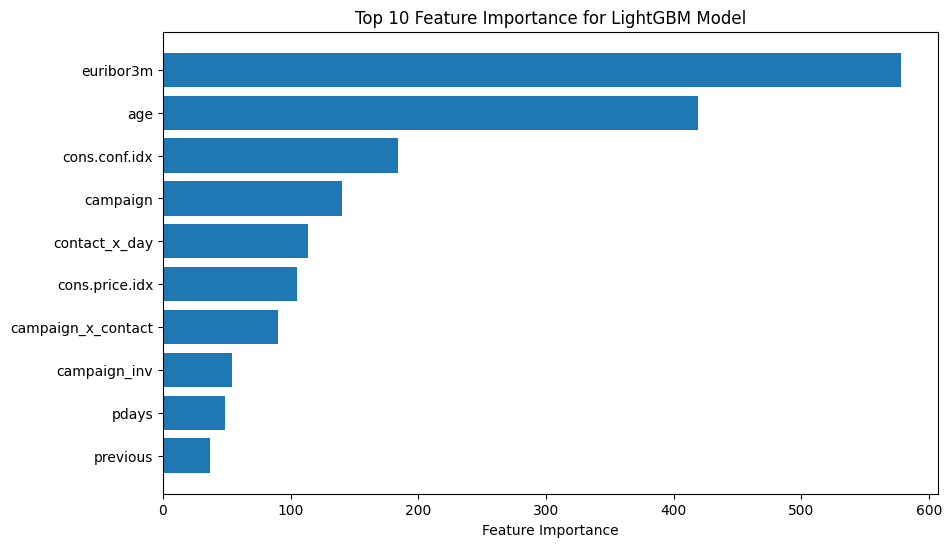

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance for LightGBM Model')
plt.gca().invert_yaxis()
plt.show()

In [47]:
feature_importance_df.head(10)

,Feature,Importance
28,euribor3m,578
0,age,419
7,cons.conf.idx,184
1,campaign,140
9,contact_x_day,114
8,cons.price.idx,105
3,campaign_x_contact,90
2,campaign_inv,54
61,pdays,49
65,previous,37


**Спостереження**

1. euribor3m - абсолютний лідер (578):

Ставка євроіндексу сильно впливає на підписку. Ймовірно, клієнти реагують на зміну макроекономіки.

2. age - потужна ознака (419):

Модель навчається гнучко на віці.

- 3–6. cons.conf.idx, campaign, contact_x_day, cons.price.idx:

Економічні індекси та поведінка клієнта/банку мають великий вплив.


- 7–10. campaign_*, pdays, previous:

Логічно: кількість контактів, чи контактували раніше тощо - всі мають вплив на рішення клієнта.

Я б сказала, що пріоритет ознак виглядає цілком адекватно з точки зору healthy common sense, і підтверджує, що модель не "підхопила" дивні або шумові фічі у топі.



##SHAP

In [48]:
#shap_values для LightGBM
explainer = shap.TreeExplainer(lgb_best)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


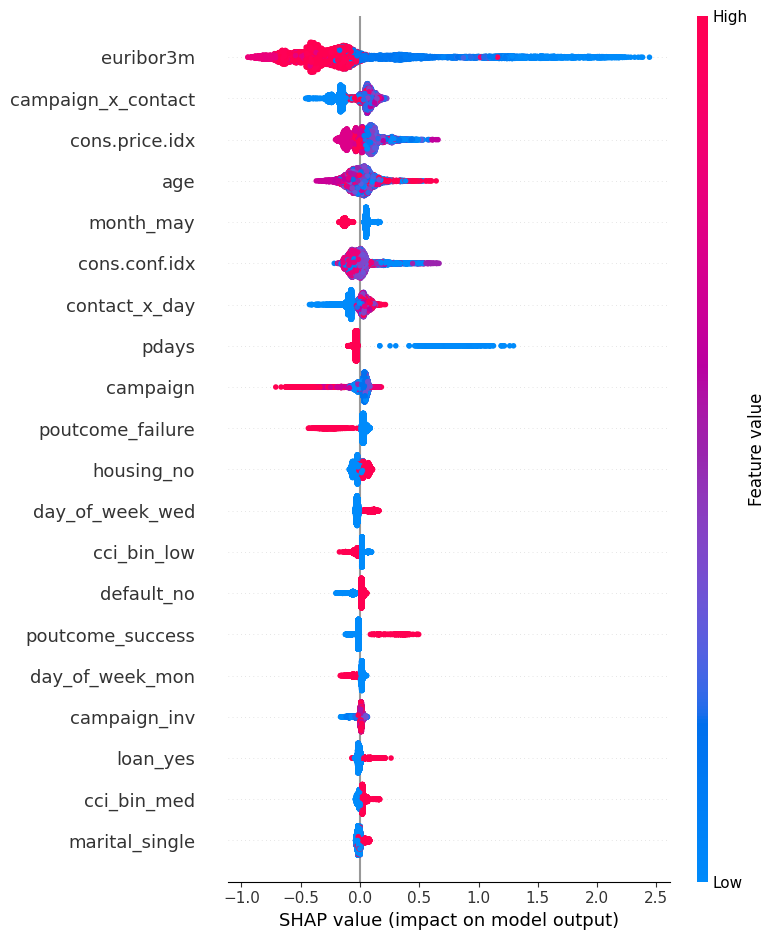

In [49]:
# Візуалізація: summary plot
shap.summary_plot(shap_values, X_test)

**Інтерпретація топових фіч**
1. euribor3m

Найвпливовіша фіча.

Низькі значення (синє) зміщують прогноз у бік "1" (підписка).

Високі значення (червоне) — навпаки, проти підписки.

Інтерпретація:

Коли ставка Euribor 3M низька - клієнти частіше погоджуються на депозит (можливо, банки пропонують вигідні умови).

Це економічно логічно, бо низька ставка - ознака м'якої монетарної політики.

2. campaign_x_contact

Взаємодія між кількістю контактів і кампаніями.

Високі значення (часті контакти) переважно зменшують шанс на підписку - можливо, клієнти втомлюються від нав'язливих дзвінків.

3. cons.price.idx

Індекс споживчих цін. Вищі значення трохи збільшують ймовірність підписки.

4. age

Високе значення (старші клієнти) - має різноспрямований вплив, отже модель враховує вік у контексті інших ознак (наприклад, age_x_month).

5. month_may

Кампанія в травні - має сильний позитивний вплив на підписку.

Інші місяці, ймовірно, мають менше значення.

6. cons.conf.idx

Індекс споживчої довіри.

Негативні значення індексу - зменшують імовірність підписки.

7–10. contact_x_day, pdays, campaign, poutcome_failure

Контакти, кількість днів від останнього дзвінка, результат попередньої кампанії - все це має значення.

Наприклад, якщо poutcome_failure, SHAP майже завжди негативне - невдалі попередні контакти знижують довіру клієнтів.

##Аналіз помилок

False Positives: 136
False Negatives: 692

=== TOP-5 Features for False Positives ===
                    mean_abs_shap  mean_direction
age                      0.128100        0.089525
campaign                 0.045467        0.025963
campaign_inv             0.018176        0.009413
campaign_x_contact       0.083382        0.066182
cci_bin_high             0.001256        0.000466

=== TOP-5 Features for False Negatives ===
                    mean_abs_shap  mean_direction
age                      0.089509        0.026431
campaign                 0.049826        0.010956
campaign_inv             0.021002        0.000183
campaign_x_contact       0.097213        0.020866
cci_bin_high             0.001704        0.000099


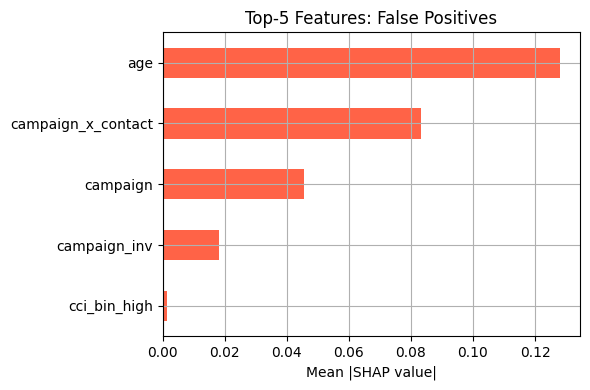

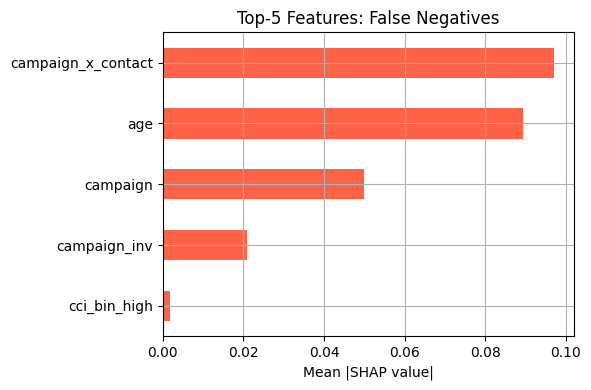

In [50]:
# 1. Прогноз і ймовірності
y_pred = lgb_best.predict(X_test)
y_pred_proba = lgb_best.predict_proba(X_test)[:, 1]

# 2. Індекси помилок
false_positives_idx = (y_test == 0) & (y_pred == 1)
false_negatives_idx = (y_test == 1) & (y_pred == 0)

print(f"False Positives: {false_positives_idx.sum()}")
print(f"False Negatives: {false_negatives_idx.sum()}")

# 3. SHAP-аналіз
explainer = shap.Explainer(lgb_best)
shap_values = explainer(X_test)

# SHAP значення для FP та FN
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns, index=X_test.index)

def top_features_for_errors(error_idx, shap_df, top_n=5):
    abs_mean_shap = shap_df.loc[error_idx].abs().mean().sort_values(ascending=False)
    mean_direction = shap_df.loc[error_idx].mean()
    result = pd.DataFrame({
        'mean_abs_shap': abs_mean_shap,
        'mean_direction': mean_direction
    })
    return result.head(top_n)

# 4. Топ-5 фічей
top_fp = top_features_for_errors(false_positives_idx, shap_df)
top_fn = top_features_for_errors(false_negatives_idx, shap_df)

print("\n=== TOP-5 Features for False Positives ===")
print(top_fp)

print("\n=== TOP-5 Features for False Negatives ===")
print(top_fn)

# 5. Візуалізація
def plot_top_features(top_df, title):
    plt.figure(figsize=(6, 4))
    top_df['mean_abs_shap'].sort_values().plot(kind='barh', color='tomato')
    plt.title(title)
    plt.xlabel('Mean |SHAP value|')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_top_features(top_fp, 'Top-5 Features: False Positives')
plot_top_features(top_fn, 'Top-5 Features: False Negatives')

**Спостереження**

- Топ-5 фіч за SHAP (False Positives)

Модель переконана у класі "yes" через високий вік.

Також сильний вплив мають: багаторазові контакти (`campaign`, `campaign_x_contact`), позитивний економічний індекс споживчої довіри (`cci_bin_high`).

Ймовірно, ці клієнти мали "схожі ознаки" на тих, хто підписував депозит, але в реальності - не підписали - помилкові позитиви.

- Топ-5 фіч за SHAP (False Negatives)

Навіть попри високий вік і часті контакти, модель впевнена, що це клас "no" - пропущено справжнього позитивного клієнта.

Важлива ознака `campaign_x_contact` тут зберігає вагу, але ймовірно значення були на "межі", або інші ознаки моделі переважили в сторону негативу.

`cci_bin_high` практично не дає вагомого сигналу.

Для оцінки якості класифікації побудую confusion matrix.



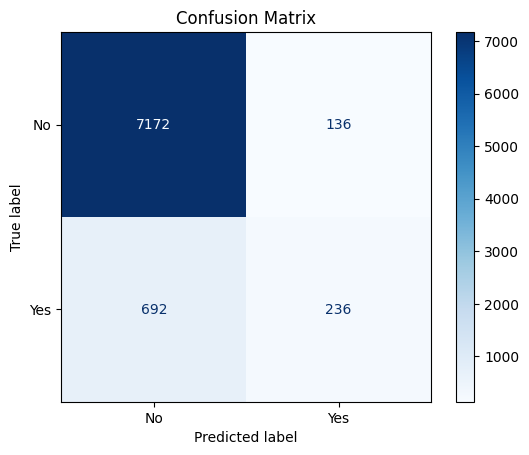

In [53]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Спостереження**

TN (True Negatives) = 7172 - правильно передбачено відсутність підписки

FP (False Positives) = 136 - модель передбачила підписку, але її не було

FN (False Negatives) = 692 - найболючіше: справжня підписка, але модель не вгадала

TP (True Positives) = 236 - модель правильно вгадала клієнтів, які підписались

### Оптимізація порогу

Оскільки зараз багато FN (692), що означає - модель часто пропускає справжніх підписників. Можна спробувати зменшити поріг класифікації (наприклад, з 0.5 до 0.2–0.3), щоб більше клієнтів віднеслося до класу 1.

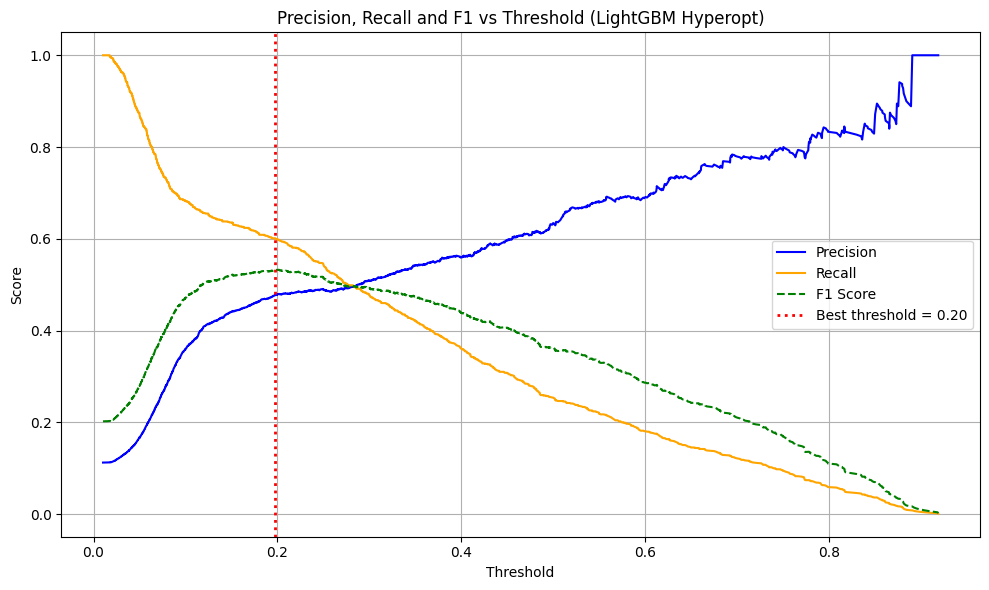

Best threshold: 0.1976
Best F1 Score: 0.5327


In [56]:
# Прогноз імовірностей
y_pred_proba_hyperopt = lgb_best.predict_proba(X_test)[:, 1]

# Precision, recall, пороги
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_hyperopt)

# Обчислюємо F1 для кожного порогу
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)  # щоб уникнути ділення на 0

# Оптимальний поріг за max F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='green', linestyle='--')

# Лінія на оптимальному порозі
plt.axvline(x=best_threshold, color='red', linestyle=':', linewidth=2, label=f'Best threshold = {best_threshold:.2f}')

# Підписи
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall and F1 vs Threshold (LightGBM Hyperopt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Вивід значення найкращого F1
print(f"Best threshold: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

In [57]:
#Confusion Matrix при цьому порозі
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix at threshold {best_threshold:.4f}:\n{cm}")

Confusion Matrix at threshold 0.1976:
[[6699  609]
 [ 370  558]]


**Cпостереження**

Поріг 0.1976 дозволив суттєво зменшити FN (було 692 - стало 370), що відповідає нашій цілі. FP зросли, але це очікувана ціна за вищий recall.

Важливо для банку: краще зробити зайву пропозицію, ніж не зробити її тому, хто міг би погодитись.

###Побудова фінальної таблиці метрик

In [58]:
# Ймовірності та предикт з порогом 0.1976
threshold = 0.1976
y_test_proba = lgb_best.predict_proba(X_test)[:, 1]
y_test_pred_thresh = (y_test_proba >= threshold).astype(int)

# Обчислення метрик
precision = precision_score(y_test, y_test_pred_thresh)
recall = recall_score(y_test, y_test_pred_thresh)
f1 = f1_score(y_test, y_test_pred_thresh)
auroc = roc_auc_score(y_test, y_test_proba)

# Вивід результатів
print(f"=== Final Test Metrics at Threshold {threshold:.4f} ===")
print(f"AUROC:     {auroc:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Повний класифікаційний звіт
print("\n" + classification_report(y_test, y_test_pred_thresh))

=== Final Test Metrics at Threshold 0.1976 ===
AUROC:     0.8107
F1 Score:  0.5320
Recall:    0.6002
Precision: 0.4777

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      7308
           1       0.48      0.60      0.53       928

    accuracy                           0.88      8236
   macro avg       0.71      0.76      0.73      8236
weighted avg       0.89      0.88      0.89      8236



**Фінальні результати моделі на тестовому наборі**

1. Поріг класифікації: 0.1976

Цей поріг був обраний на основі максимізації F1-міри для кращого балансу між Recall і Precision.

2. Ключові метрики:

- AUROC=0.8107	- стійка здатність моделі розрізняти підписників та непідписників. Модель надійна навіть при зміні порогу класифікації.

- F1 Score=0.5320 - баланс Precision та Recall - оптимальний для бізнес-задачі

- Recall=0.6002 - виявлено понад 60% потенційних клієнтів

- Precision=0.4777 - майже кожен другий клієнт, якого ми таргетуємо, справді зацікавлений.

- Accuracy=0.88 -	загальна точність передбачень.

**Загальний висновок для бізнесу:**

Модель дозволяє ефективно таргетувати потенційних клієнтів з хорошим балансом між охопленням і якістю передбачень. Вона може бути використана в продакшені, наприклад: для формування списку клієнтів для дзвінків, в автоматизованих email- або sms-кампаніях, у системі скорингу для менеджерів.